In [ ]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\output", "*.h5"))

eta_hat, phi_hat, Hs, Tp, modes, time, length, x = None, None, None, None, None, None, None, None

with h5py.File("Z:\\files\\simulation_1d_compressed.h5", "r") as data:
    eta_hat = data["eta_hat"][:]
    phi_hat = data["phi_hat"][:]
    Hs = data["Hs"][:]
    Tp = data["Tp"][:]
    time = data["time"][:]

    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]
    x = np.linspace(0, length, 2*modes)

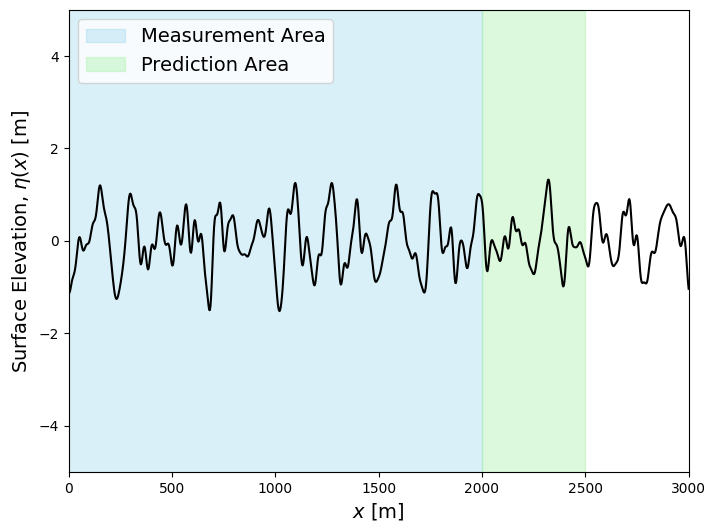

In [ ]:
y = irfft(eta_hat[0, 200, :])
x = np.linspace(0, length, len(y))

fontsize = 14

fig, axs = plt.subplots(figsize=(8, 6))
plt.plot(x, y, color="k")
plt.xlim(0, length)
plt.ylim(-5, 5)
plt.axvspan(0, 2000, color='skyblue', alpha=0.3, label='Measurement Area')
plt.axvspan(2000, 2500, color='lightgreen', alpha=0.3, label='Prediction Area')
axs.grid(True, which='major', linewidth=0.8)
axs.minorticks_on()
axs.grid(True, which='minor', linestyle=':', linewidth=0.5)
axs.tick_params(labelsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlabel(fr"$x$ [m]", fontsize=fontsize)
plt.ylabel(fr"Surface Elevation, $\eta(x)$ [m]", fontsize=fontsize)
plt.show()

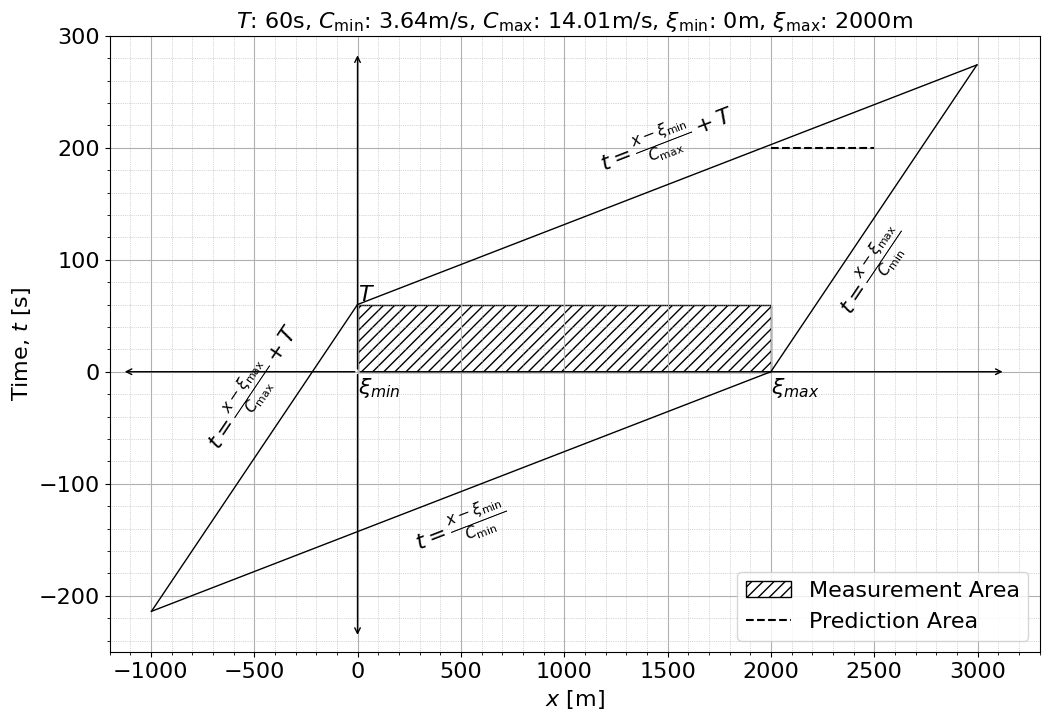

In [86]:
import matplotlib.pyplot as plt
import numpy as np

e_min = 0
e_max = 2000

c_min = 3.64
c_max = 14.01

T = 60

x_min = -1200
x_max = 3300
y_min = -250
y_max = 300



x1 = (e_min*c_max - c_min*e_max) / (c_max - c_min) - T * (c_max * c_min) / (c_max - c_min)
t1 = (x1 - e_max) / c_max

x2 = (e_max*c_max - c_min*e_min) / (c_max - c_min) + T * (c_max * c_min) / (c_max - c_min)
t2 = (x2 - e_max) / c_min

points_x = [T, t2, 0, t1, T]
points_y = [e_min, x2, e_max, x1, e_min]

box_x = [T, T, 0, 0] #T]
box_y = [e_min, e_max, e_max, e_min] #, e_min]

equations = [
    fr"$t=\frac{{x - x_{{\max}}}}{{c_{{\min}}}}$", 
    r"eq2", 
    r"eq3", 
    r"eq4"
]

equations = [
    fr"$t=\frac{{x - \xi_{{\min}}}}{{C_{{\max}}}} + T$",
    fr"$t = \frac{{x - \xi_{{\max}}}}{{C_{{\min}}}}$", 
    fr"$t = \frac{{x - \xi_{{\min}}}}{{C_{{\min}}}}$", 
    fr"$t=\frac{{x - \xi_{{\max}}}}{{C_{{\max}}}} + T$"
]

fontsize = 16
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.grid(True, which='major', linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

ax = plt.gca()
transform = ax.transData.transform

for index in range(len(points_x)-1):
    x0, x1 = points_y[index], points_y[index+1]   # matplotlib x-coords
    y0, y1 = points_x[index], points_x[index+1]

    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2

    # compute angle in degrees for text rotation
    (x0_disp, y0_disp) = transform((x0, y0))
    (x1_disp, y1_disp) = transform((x1, y1))
    angle = np.degrees(np.arctan2(y1_disp - y0_disp, x1_disp - x0_disp))+[0, 180, 180, 0][index]

    # place the equation string
    plt.text(xm, ym, equations[index],
             rotation=angle,
             ha="center", va=["bottom", "top", "top", "bottom"][index],
             fontsize=fontsize)

    plt.plot([x0, x1], [y0, y1], color="k", linewidth=1)
    # plt.plot(box_y[index:index+2], box_x[index:index+2], color="k", linewidth=1)

plt.fill(box_y, box_x, color="white", hatch='///', edgecolor='black', linewidth=1, label="Measurement Area")

# plt.grid()
# plt.title("Predictable Zone With continous measurement:\n" + fr" $\xi (t, x), \quad x \in [0, 2000], t \in [0, 60]$" + "\n" + fr"$C_{{g,\min}}={c_min:.2f}m/s, \quad C_{{g,\max}}={c_max:.2f}m/s$", fontsize=20)
plt.ylabel("Time, $t$ [s]", fontsize=fontsize)
plt.xlabel("$x$ [m]", fontsize=fontsize)

# plt.plot([points_y[1], 0], [points_x[1], points_x[1]],"k--")
# plt.plot([points_y[3], 0], [points_x[3], points_x[3]],"k--")
# plt.text(0-x_max*0.01, points_x[1], fr"$T_e$", ha="right", va="center", fontsize=fontsize)
# plt.text(0+x_max*0.01, points_x[3], fr"$T_s$", ha="left", va="center", fontsize=fontsize)

# plt.text(x_max*0.95, -y_max*0.01, fr"$x$", ha="right", va="top", fontsize=fontsize)
# plt.text(x_max*0.01, y_max*0.95, fr"$t$", ha="left", va="top", fontsize=fontsize)
plt.text(points_y[0], points_x[0], fr"$T$", ha="left", va="bottom", fontsize=fontsize)
plt.text(points_y[2], points_x[2]-y_max*0.01, fr"$\xi_{{max}}$", ha="left", va="top", fontsize=fontsize)
plt.text(e_min, 0-y_max*0.01, fr"$\xi_{{min}}$", ha="left", va="top", fontsize=fontsize)
ax.annotate('', xy=(x_max*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_max*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(x_min*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_min*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))


cut_index = np.argmin(np.abs(x-2000))
cut_index_2 = np.argmin(np.abs(x-2500))
plt.plot([x[cut_index], x[cut_index_2]], [200, 200], "--", color = "k", label="Prediction Area")
plt.title(fr"$T$: 60s, $C_{{\min}}$: {c_min:.2f}m/s, $C_{{\max}}$: {c_max:.2f}m/s, $\xi_{{\min}}$: {e_min:.0f}m, $\xi_{{\max}}$: {e_max:.0f}m", fontsize=fontsize)

ax.tick_params(labelsize=fontsize)
plt.legend(loc = 4, fontsize=fontsize)
plt.savefig("results/case_1d.pdf", dpi=300, bbox_inches='tight')
plt.show()

# jupyter nbconvert ML_update.ipynb --to pdf --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['hide_input']" --TagRemovePreprocessor.remove_all_outputs_tags="['hide_output']" --PDFExporter.preprocessors="['nbconvert.preprocessors.TagRemovePreprocessor']"

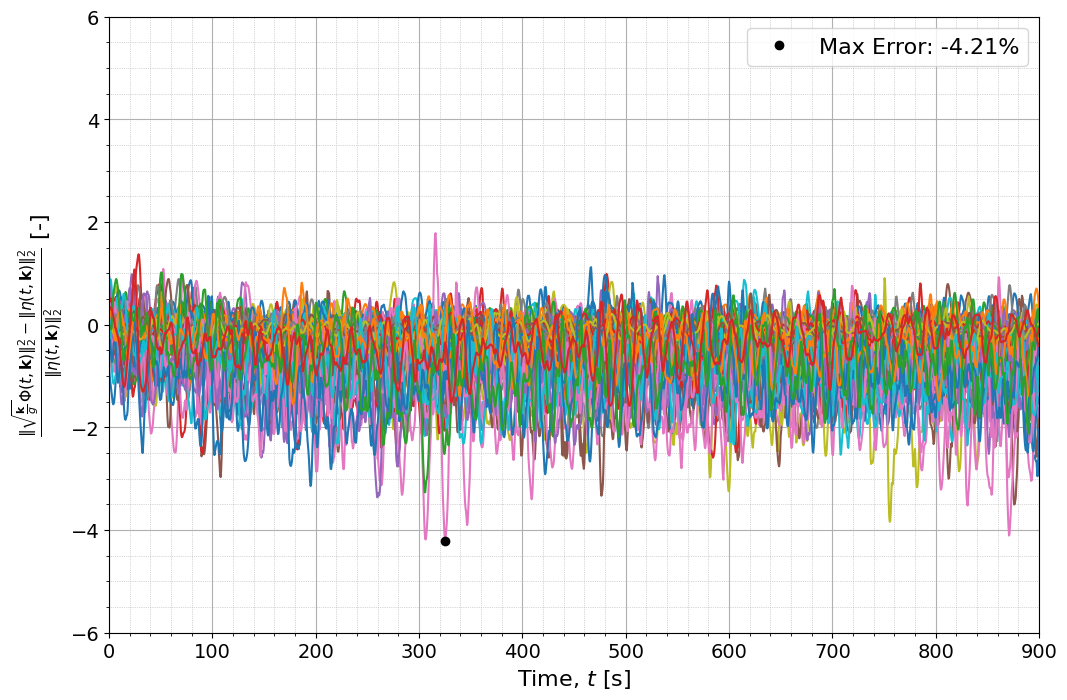

In [225]:
index = np.argmax(np.abs(eta_hat[8, 100, :]), axis=-1)



k0 = 2*np.pi/length
g = 9.81
# for index in range(1, 20):
#     # plt.plot(np.abs(eta_hat[8, :, index]))
#     # plt.plot(np.abs(phi_hat[8, :, index]*np.sqrt(k0*index/g)))
#     # plt.show()

#     e = np.abs(eta_hat[8, :, index])
#     p = np.abs(phi_hat[8, :, index]*np.sqrt(k0*index/g))

#     plt.plot(p/e)
#     plt.show()


k = np.arange(1, 513)*k0
w = np.sqrt(g*k)
corr = w / g

fig, ax = plt.subplots(figsize=(12, 8))
e = np.sum(np.abs(eta_hat[:, 200:, 1:]), axis=-1)**2
p = np.sum(np.abs(phi_hat[:, 200:, 1:])*corr, axis=-1)**2
for i in range(64):
    plt.plot(time[:-200], (e[i]-p[i])/p[i]*100)

row, col = np.unravel_index(np.argmax(np.abs(((e-p)/p))), p.shape)
plt.plot(time[col], ((e-p)/p)[row, col]*100, "o", color="k", label=f"Max Error: {((e-p)/p)[row, col]*100:.2f}%")

fontisze=14
ax.set_xlabel('Time, $t$ [s]', fontsize=fontsize)
ax.set_ylabel('$\\frac{{\\|\\sqrt{{\\frac{{\\mathbf{{k}}}}{{g}}}}\\Phi(t, \\mathbf{{k}})\\|^2_2-\\|\\eta(t, \\mathbf{{k}})\\|^2_2}}{{\\|\\eta(t, \\mathbf{{k}})\\|^2_2}}$ [-]', fontsize=fontsize)
ax.set_xlim(0, 900)
ax.set_ylim(-0.06*100, 0.06*100)
# ax.legend(fontsize=fontsize)
ax.grid(True, which='major', linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)
ax.tick_params(labelsize=fontisze)
plt.legend(fontsize=fontsize)
plt.savefig("results/error_lyapunov.pdf", dpi=300, bbox_inches='tight')



In [1]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft2, irfft2
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\output", "*.h5"))

y, Hs, Tp, modes, time, length, x = None, None, None, None, None, None, None

with h5py.File("Z:\\files\\simulation_2d_compressed.h5", "r") as data:
    y = data["y"][:]
    Hs = data.attrs["Hs"]
    Tp = data.attrs["Tp"]

    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]
    x = np.linspace(0, length, 2*modes)

index = 100
eta_hat = y[index:, 0, :, :].astype(np.complex64)

In [42]:
import numpy as np
import plotly.graph_objects as go

opacity = 1
alpha = 0.3

# Box bounds
x_min, x_max = -1500, 1500
y_min, y_max = -1500, 1500
z_min, z_max = 0, 60  # for example, 7 * 10 spacing

# Create the six faces as separate surfaces

opacity = 1
alpha = 0.1

fontisze = 25

# Box bounds for red box (Measurements)
x_min, x_max = -1500, 1500
y_min, y_max = -1500, 1500
z_min, z_max = 0, 60  # red box covers from 0 to 60

# Box bounds for blue box (Prediction)
z_min_blue, z_max_blue = 115, 120

fig = go.Figure()

# --- Red box (Measurements) ---
# faces_red = [
#     # Bottom face (z = z_min)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_min, y_min], [y_max, y_max]],
#          z=[[z_min, z_min], [z_min, z_min]]),
#     # Top face (z = z_max)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_min, y_min], [y_max, y_max]],
#          z=[[z_max, z_max], [z_max, z_max]]),
#     # Front face (y = y_min)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_min, y_min], [y_min, y_min]],
#          z=[[z_min, z_min], [z_max, z_max]]),
#     # Back face (y = y_max)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_max, y_max], [y_max, y_max]],
#          z=[[z_min, z_min], [z_max, z_max]]),
#     # Left face (x = x_min)
#     dict(x=[[x_min, x_min], [x_min, x_min]],
#          y=[[y_min, y_max], [y_min, y_max]],
#          z=[[z_min, z_min], [z_max, z_max]]),
#     # Right face (x = x_max)
#     dict(x=[[x_max, x_max], [x_max, x_max]],
#          y=[[y_min, y_max], [y_min, y_max]],
#          z=[[z_min, z_min], [z_max, z_max]])
# ]

# for face in faces_red:
#     fig.add_trace(go.Surface(
#         x=face['x'],
#         y=face['y'],
#         z=face['z'],
#         colorscale=[[0, 'red'], [1, 'red']],
#         showscale=False,
#         opacity=alpha,
#         name='Measurement region',
#         showlegend=False
#     ))

# # --- Blue box (Prediction) ---
# faces_blue = [
#     # Bottom face (z = z_min_blue)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_min, y_min], [y_max, y_max]],
#          z=[[z_min_blue, z_min_blue], [z_min_blue, z_min_blue]]),
#     # Top face (z = z_max_blue)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_min, y_min], [y_max, y_max]],
#          z=[[z_max_blue, z_max_blue], [z_max_blue, z_max_blue]]),
#     # Front face (y = y_min)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_min, y_min], [y_min, y_min]],
#          z=[[z_min_blue, z_min_blue], [z_max_blue, z_max_blue]]),
#     # Back face (y = y_max)
#     dict(x=[[x_min, x_max], [x_min, x_max]],
#          y=[[y_max, y_max], [y_max, y_max]],
#          z=[[z_min_blue, z_min_blue], [z_max_blue, z_max_blue]]),
#     # Left face (x = x_min)
#     dict(x=[[x_min, x_min], [x_min, x_min]],
#          y=[[y_min, y_max], [y_min, y_max]],
#          z=[[z_min_blue, z_min_blue], [z_max_blue, z_max_blue]]),
#     # Right face (x = x_max)
#     dict(x=[[x_max, x_max], [x_max, x_max]],
#          y=[[y_min, y_max], [y_min, y_max]],
#          z=[[z_min_blue, z_min_blue], [z_max_blue, z_max_blue]])
# ]

# for face in faces_blue:
#     fig.add_trace(go.Surface(
#         x=face['x'],
#         y=face['y'],
#         z=face['z'],
#         colorscale=[[0, 'blue'], [1, 'blue']],
#         showscale=False,
#         opacity=alpha,
#         name='Prediction region',
#         showlegend=False
#     ))

# --- Your wave surfaces and other traces should be added here as before ---

fig.update_layout(
    scene=dict(
        xaxis_title="x [m]",
        yaxis_title="y [m]",
        zaxis_title="Time [s]",
        zaxis=dict(
            showgrid=True,
            zeroline=False,
            showticklabels=True,
        )
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

num_times = 7
modes = eta_hat.shape[1] // 2

x = np.linspace(-1500, 1500, modes//2)
y = np.linspace(-1500, 1500, modes//2)
X, Y = np.meshgrid(x, y)

mask = X**2+Y**2 < 400**2
mask_2 = X**2+Y**2 > 1500**2

# Vertical spacing between surfaces
z_spacing = 10  # adjust to your liking

for t in range(num_times):
    # Compute surface at time t
    Z = irfft2(eta_hat[t*20])[::4, ::4]*0.25
    
    # Add vertical offset
    Z_offset = Z + t * z_spacing
    Z_offset[mask] = np.nan
    Z_offset[mask_2] = np.nan
    
    # Add surface trace
    fig.add_trace(go.Surface(
        z=Z_offset,
        x=x,
        y=y,
        colorscale='Viridis',
        showscale=False,
        name=f"t={t}",
        opacity=opacity,
    ))


Z = irfft2(eta_hat[((6+6)*20)])[::4, ::4]*0.25
Z_offset = Z + 120
Z_offset[~mask] = np.nan

# Add surface trace
fig.add_trace(go.Surface(
    z=Z_offset,
    x=x,
    y=y,
    colorscale='Viridis',
    showscale=False,
    name=f"t={t}",
    opacity=opacity,
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title="x [m]",
        yaxis_title="y [m]",
        zaxis_title="Time [s]",
        zaxis=dict(
            showgrid=True,
            zeroline=False,
            showticklabels=True,
        )
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

shaft_length = 140  # should cover your full z-axis range
shaft = go.Scatter3d(
    x=[0, 0],
    y=[0, 0],
    z=[0, shaft_length-5],
    mode='lines',
    line=dict(color='black', width=5),
    showlegend=False
)

# Arrowhead (cone) at the top of the shaft
arrowhead = go.Cone(
    x=[0],
    y=[0],
    z=[shaft_length],
    u=[0],
    v=[0],
    w=[10],  # length of the cone arrowhead
    sizemode="absolute",
    sizeref=10,
    anchor="tip",
    showscale=False,
    colorscale=[[0, 'black'], [1, 'black']],
    name='Z axis arrow'
)

fig.add_trace(shaft)
fig.add_trace(arrowhead)

# fig.add_trace(go.Scatter3d(
#     x=[None], y=[None], z=[None],
#     mode='markers',
#     marker=dict(size=10, color='red', opacity=opacity),
#     name='Measurements'
# ))

# fig.add_trace(go.Scatter3d(
#     x=[None], y=[None], z=[None],
#     mode='markers',
#     marker=dict(size=10, color='blue', opacity=opacity),
#     name='Prediction'
# ))

# fig.update_layout(
#     legend=dict(
#         x=0.6,          # middle horizontally
#         y=0.8,          # middle vertically
#         xanchor='center',
#         yanchor='middle',
#         font=dict(
#             size=fontisze,   # large font size
#             color='black'
#         ),
#         bgcolor='rgba(255,255,255,0.0)',  # semi-transparent background for readability
#         bordercolor='white',
#         borderwidth=0
#     )
# )


fig.update_layout(
    plot_bgcolor='white',  # plot area background
    paper_bgcolor='white', # entire figure background
    xaxis=dict(
        showgrid=True,
        gridcolor='black',   # black grid lines
        zerolinecolor='black', # zero line color (optional)
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='black',
        zerolinecolor='black'
    ),

     scene=dict(
        xaxis=dict(
            tickfont=dict(size=fontisze-10),
            title=dict(font=dict(size=fontisze+5)),
        ),
        yaxis=dict(
            tickfont=dict(size=fontisze-10),
            title=dict(font=dict(size=fontisze+5)),
        ),
        zaxis=dict(
            tickfont=dict(size=fontisze-10),
            title=dict(font=dict(size=fontisze+5)),
        ),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)  # Increase these values to zoom out
        )
    )
)

fig.write_image("stacked_wave_surfaces.pdf", width=1000, height=600)
fig.show()
